# Computational Social Science Project #2 

*Group number:* 5

*Group members:*  Xue,Mingfeng
                  Sgambati,Tyrone
                  Lacey,Karalyn
                  Misunas,Christina
 

*Semester:* Fall 2022


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send KQ a pull request on GitHub flagging the syntax that's tripping you up 

## 1. Introduction/Setup

#### a) Import relevant libraries
Add the other libraries you need for your code below and/or as you go. 

In [4]:
# import libraries you might need here 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# use random seed for consistent results 
np.random.seed(273)

#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. 

In [11]:
diabetes = pd.read_csv('Diabetes with Population Info by County 2017.csv', 
                       #CountyFips needs to be a string so leading 0 isn't dropped (this is only if you want to make choropleth map): 
                       dtype={"CountyFIPS": str}) 

In [12]:
# look at the dimensions of the diabetes data frame
print('shape: ', diabetes.shape) 
print(f"dataset has {diabetes.shape[0]} rows and {diabetes.shape[1]} columns")

shape:  (3220, 95)
dataset has 3220 rows and 95 columns


In [13]:
diabetes.head()

County    State CountyFIPS Diabetes_Number Obesity_Number  \
0  Autauga County  Alabama      01001            5178          13489   
1  Baldwin County  Alabama      01003           16707          48542   
2  Barbour County  Alabama      01005            3400           8009   
3     Bibb County  Alabama      01007            2371           6534   
4   Blount County  Alabama      01009            6282          14227   

  Physical_Inactivity_Number  \
0                      12525   
1                      40024   
2                       5431   
3                       5827   
4                      14365   

  sex and age_total population_65 years and over_sex ratio (males per 100 females)  \
0                                               76.5                                 
1                                               86.6                                 
2                                               76.2                                 
3                                               80.5                                 
4                                               79.7                                 

   race_total population  race_total population_one race  \
0                  55200                           54170   
1                 208107                          204535   
2                  25782                           25429   
3                  22527                           22340   
4                  57645                           56710   

   race_total population_two or more races  ...  \
0                                     1030  ...   
1                                     3572  ...   
2                                      353  ...   
3                                      187  ...   
4                                      935  ...   

   sex and age_total population_21 years and over  \
0                                           39614   
1                                          155502   
2                                           19394   
3                                           16864   
4                                           42232   

   sex and age_total population_62 years and over  \
0                                            9403   
1                                           49811   
2                                            5658   
3                                            4323   
4                                           12400   

   sex and age_total population_65 years and over  \
0                                            8050   
1                                           40665   
2                                            4634   
3                                            3661   
4                                           10233   

   sex and age_total population_18 years and over_1  \
0                                             41831   
1                                            162430   
2                                             20346   
3                                             17868   
4                                             44177   

   sex and age_total population_18 years and over_male  \
0                                              20054     
1                                              78104     
2                                              10923     
3                                               9578     
4                                              21595     

   sex and age_total population_18 years and over_female  \
0                                              21777       
1                                              84326       
2                                               9423       
3                                               8290       
4                                              22582       

   sex and age_total population_18 years and over_sex ratio (males per 100 females)  \
0                                               92.1                                  
1                           

In [14]:
pd.set_option('display.max_rows', 100) # tells pandas how many rows to display when printing so results don't get truncated

# look at the data types for each column in diabetes df 
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [15]:
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes['Diabetes_Number'].str.isnumeric()]['Diabetes_Number'].unique()) 

['Suppressed']


In [16]:
# Now do the same as above, but for "Obesity_Number" :
print(diabetes[~diabetes['Obesity_Number'].str.isnumeric()]['Obesity_Number'].unique()) 

['No Data']


In [17]:
print(diabetes[~diabetes['Physical_Inactivity_Number'].str.isnumeric()]['Physical_Inactivity_Number'].unique()) 

['No Data']


The values contained in the two columns above making them objects (rather than integers) appear to be strings like "No Data" and "Suppressed." Let's drop those rows in the next section, and also recode Physical_Inactivity_Number to be an integer. 

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' to. 

In [18]:
# Diabetes
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"]  # note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype('int') 

# Obesity
diabetes = diabetes[diabetes['Obesity_Number']!="No Data"] 
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype('int') 

# Physical Inactivity
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!="No Data"]
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype('int') 

# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]
# change to numeric (specifically, integer or float?) from string (because originally included the "-" )
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype('float16')


We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [19]:
# select count variables to rc to percentages; make sure we leave out ratios and our population variable b/c these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 'sex and age_total population_sex ratio (males per 100 females)', 'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]
           
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') # recode all selected columns to numeric

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)

Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [20]:
pd.set_option('display.max_columns', None)
# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[0,1,3,7]]) # select which columns in the summary table we want to present

count          mean  \
Diabetes_Number                                     3112.0  9.285654e-02   
Obesity_Number                                      3112.0  2.516656e-01   
Physical_Inactivity_Number                          3112.0  2.008606e-01   
sex and age_total population_65 years and over_...  3112.0           inf   
race_total population                               3112.0  1.036826e+05   
race_total population_one race                      3112.0  9.760594e-01   
race_total population_two or more races             3112.0  2.394059e-02   
race_total population_one race_1                    3112.0  9.760594e-01   
race_total population_one race_white                3112.0  8.311072e-01   
race_total population_one race_black or african...  3112.0  9.021540e-02   
race_total population_one race_american indian ...  3112.0  1.939781e-02   
race_total population_one race_american indian ...  3112.0  1.791224e-03   
race_total population_one race_american indian ...  3112.0  1.337839e-03   
race_total population_one race_american indian ...  3112.0  1.228883e-03   
race_total population_one race_american indian ...  3112.0  3.315443e-03   
race_total population_one race_asian                3112.0  1.374892e-02   
race_total population_one race_asian_asian indian   3112.0  2.627566e-03   
race_total population_one race_asian_chinese        3112.0  2.643755e-03   
race_total population_one race_asian_filipino       3112.0  2.743903e-03   
race_total population_one race_asian_japanese       3112.0  7.070004e-04   
race_total population_one race_asian_korean         3112.0  1.173705e-03   
race_total population_one race_asian_vietnamese     3112.0  1.254984e-03   
race_total population_one race_asian_other asian    3112.0  2.598010e-03   
race_total population_one race_native hawaiian ...  3112.0  8.736453e-04   
race_total population_one race_native hawaiian ...  3112.0  3.028281e-04   
race_total population_one race_native hawaiian ...  3112.0  1.420261e-04   
race_total population_one race_native hawaiian ...  3112.0  1.338096e-04   
race_total population_one race_native hawaiian ...  3112.0  2.949815e-04   
race_total population_one race_some other race      3112.0  2.071642e-02   
race_total population_two or more races_1           3112.0  2.394059e-02   
race_total population_two or more races_white a...  3112.0  6.443784e-03   
race_total population_two or more races_white a...  3112.0  8.618273e-03   
race_total population_two or more races_white a...  3112.0  3.020738e-03   
race_total population_two or more races_black o...  3112.0  6.521127e-04   
race alone or in combination with one or more o...  3112.0  1.000000e+00   
race alone or in combination with one or more o...  3112.0  8.529070e-01   
race alone or in combination with one or more o...  3112.0  9.887504e-02   
race alone or in combination with one or more o...  3112.0  2.992315e-02   
race alone or in combination with one or more o...  3112.0  1.821307e-02   
race alone or in combination with one or more o...  3112.0  2.066723e-03   
race alone or in combination with one or more o...  3112.0  2.362550e-02   
hispanic or latino and race_total population        3112.0  1.000000e+00   
hispanic or latino and race_total population_hi...  3112.0  9.320102e-02   
hispanic or latino and race_total population_hi...  3112.0  6.933120e-02   
hispanic or latino and race_total population_hi...  3112.0  5.656247e-03   
hispanic or latino and race_total population_hi...  3112.0  1.568324e-03   
hispanic or latino and race_total population_hi...  3112.0  1.664525e-02   
hispanic or latino and race_total population_no...  3112.0  9.067990e-01   
hispanic or latino and race_total population_no...  3112.0  7.650655e-01   
hispanic or latino and race_total population_no...  3112.0  8.881706e-02   
hispanic or latino and race_total population_no...  3112.0  1.801640e-02   
hispanic or latino and race_total population_no...  3112.0  1.353425e-02   
hispanic or latino and ra

#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. 

In [21]:
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['sex and age_total population_18 years and over_1',
 'race_total population_one race_1',
 'sex and age_total population_65 years and over_1',
 'sex and age_total population',
 'race_total population_two or more races_1',
 'hispanic or latino and race_total population']

In [22]:
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns=duplicateColumnNames) 

## 2. Exploratory Data Analysis

### Mingfeng: Correlation between Diabetes_Number and features gives us a general picture of the relationship

I used two plots in exploratory data analysis. The first one is the Top 30 Correlation Coefficients between Features and Diabetes_Number, based on absoulte correlation coefficients, because it gives a a general picture of the relationship between important features and outcome. The next plot is the correlation matrix plot of all features and outcome. It mainly shows us the relationship among features, which helps us in the following steps.

Text(0.5, 1.0, 'Top 30 Correlation Coefficients between Features and Diabetes_Number')

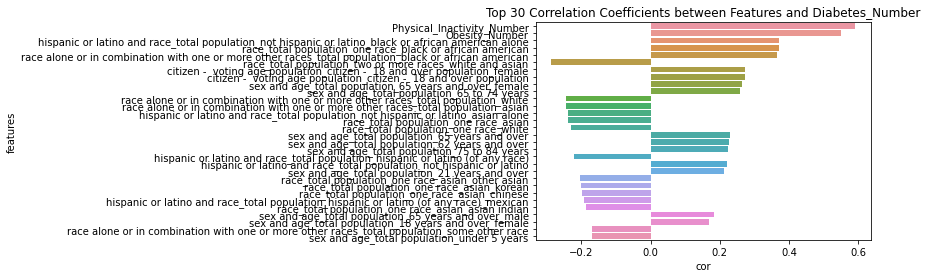

In [23]:

corr_df=pd.DataFrame({'features':diabetes.drop(['County', 'CountyFIPS','State','Diabetes_Number'],axis=1).columns,
    'cor':[diabetes[i].astype('float').corr(diabetes['Diabetes_Number']) for i in diabetes.drop(['County', 'CountyFIPS','State','Diabetes_Number'],axis=1).columns]}
                    )
corr_df['abs_cor']=corr_df.cor.abs()

corr_df=corr_df.sort_values('abs_cor',ascending=False)

sns.barplot(x="cor", y="features", data=corr_df.iloc[0:30,:]).set_title("Top 30 Correlation Coefficients between Features and Diabetes_Number")

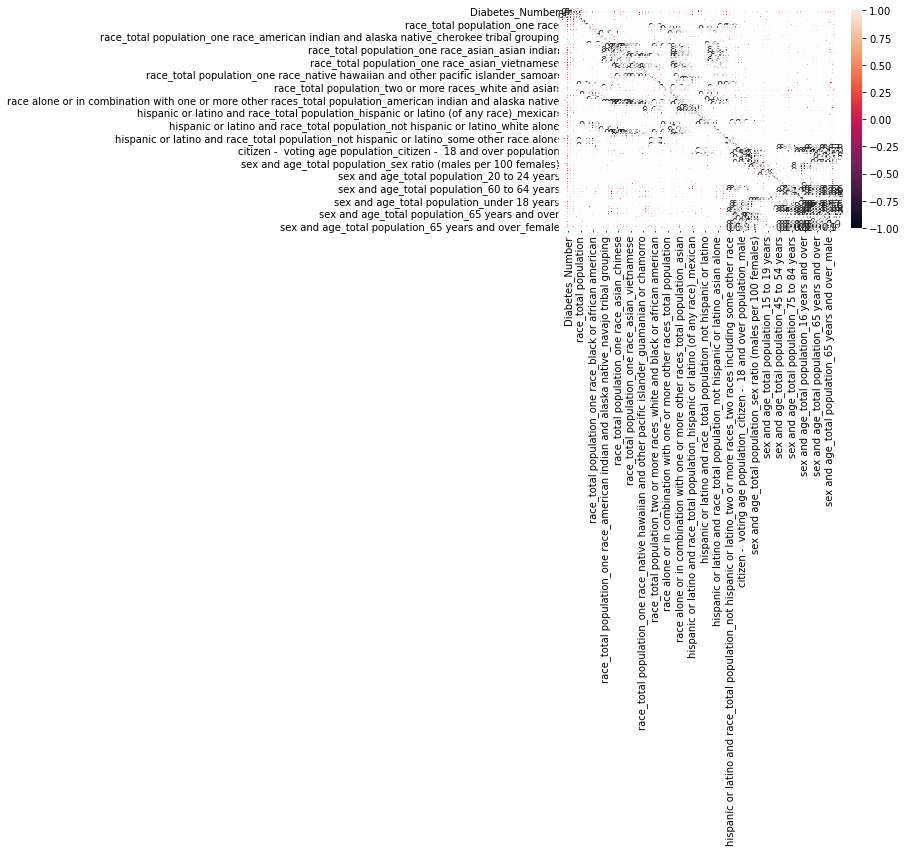

In [24]:
##import seaborn as sns

cor_matrix = diabetes.corr().round(2)
sns.heatmap(cor_matrix, annot=True)
plt.show()

### GRAPHS TO USE FOR KARALYN
These plots are useful in affirming that there appears to be a relationship between the rate of diabetes and the rate of physical inactivity and the rate of obesity. They also show that rates of physical inactivity and obesity appear to be normally distributed, but that Diabetes appears to be skewed.

C:\Users\mingf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Physical_Inactivity_Number', ylabel='Diabetes_Number'>

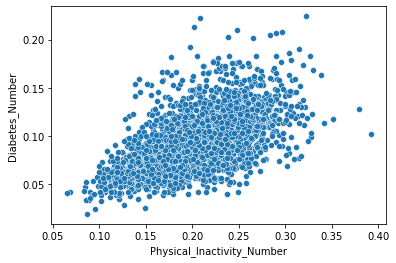

In [25]:

sns.scatterplot('Physical_Inactivity_Number', 'Diabetes_Number', data=diabetes)

C:\Users\mingf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Obesity_Number', ylabel='Diabetes_Number'>

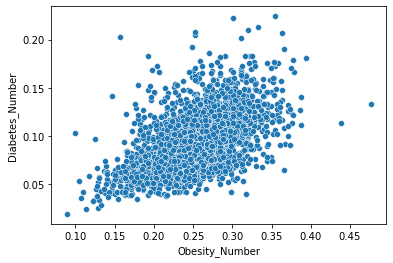

In [26]:
sns.scatterplot('Obesity_Number', 'Diabetes_Number', data=diabetes)

Text(0.5, 1.0, 'Density plot of Physical Inactivity')

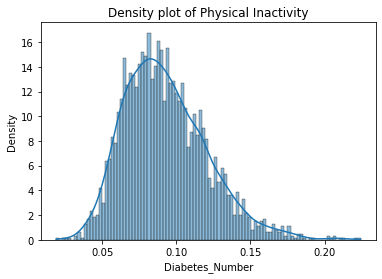

In [27]:
hist1 = sns.histplot(diabetes['Diabetes_Number'], stat = "density", kde = True, bins = 100)
hist1.set_xlabel("Diabetes_Number")
hist1.set_title("Density plot of Physical Inactivity")

### Tyrone
This plot is useful in understanding the data we have available to us. The ratio of males to females may be of interest in the context of diabetes research because men are significantly more likely to develop Type 2 diabetes than women. Although most counties are normally distributed around an even ratio of men and women it does appear that we have some counties with many more men than women. 

Text(0.5, 1.0, 'Density plot of males per 100 females in counties of interest')

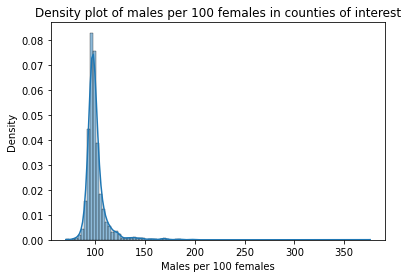

In [28]:
hist1 = sns.histplot(diabetes['sex and age_total population_sex ratio (males per 100 females)'], stat = "density", kde = True, bins = 100)
hist1.set_xlabel("Males per 100 females")
hist1.set_title("Density plot of males per 100 females in counties of interest")

### Christina: Generating maps to visually identify counties with the highest rates of diabetes, overweight, physical inactivity 
Why maps? Generating maps can help policymakers visually identify the counties and  regions in the United States with the highest rates of diabetes, obesity, physical inactivity. For policymakers, maps are particularly useful at identifying "hot spots."  Visually comparing rates of diabetes, obesity, and physical inactivity using maps might also give policymakers a sense of how the behavioral factor (physical inactivity) might overlap with the health outcomes (diabetes or obesity). Key takeaways from these maps: We can quickly see that the southern region of the United States has some of the highest rates of diabetes, obesity, physical inactivity. This might indicate a linking of the behavioral factor (physical inactivity) with the health outcomes (diabetes or obesity)—a finding consistent with research on risk factors for these two health outcomes. We also note some outliers in other regions. For example, Harding, New Mexico appears to be a “hot spot” for physical inactivity.

In [ ]:
import matplotlib.pyplot as plt
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)
import plotly.express as px

# Generating a map to identify counties with the highest rates of diabetes 
fig1 = px.choropleth(diabetes, geojson=counties, locations='CountyFIPS', color='Diabetes_Number',
                           color_continuous_scale="Viridis",
                           range_color=(0.01, 0.23),
                           scope="usa",
                           labels={'Diabetes_Number':'Rate of Diabetes'}
                          )
fig1.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [ ]:
# Generating a map to identify counties with the highest rates of obesity
fig2 = px.choropleth(diabetes, geojson=counties, locations='CountyFIPS', color='Obesity_Number',
                           color_continuous_scale="Viridis",
                           range_color=(0.08, .48),
                           scope="usa",
                           labels={'Obesity_Number':'Rate of Obesity'}
                          )
fig2.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

In [ ]:
# Generating a map to identify counties with the highest rates of physical inactivity
fig3 = px.choropleth(diabetes, geojson=counties, locations='CountyFIPS', color='Physical_Inactivity_Number',
                           color_continuous_scale="Viridis",
                           range_color=(0.06, 0.4),
                           scope="usa",
                           labels={'Physical_Inactivity_Number':'Rate of Physical Inactivity'}
                          )
fig3.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'State' to be a categorical variable using `pd.get_dummies` and drop 'County' using `.drop()` because 'CountyFIPS' is already a unique identifier for the county. 

In [32]:
drop_features=['County', 'CountyFIPS']

In [33]:
# create dummy features out of 'State' , which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ['State'],  
                               drop_first = True) # only create 49 dummies by dropping first in category

# drop 'County' variable
diabetes_clean = diabetes_clean.drop(labels = drop_features,
                               axis = 1) # which axis tells python we want to drop columns rather than index rows?

# look at first 10 rows of new data frame 
diabetes_clean.head(10) 

Diabetes_Number  Obesity_Number  Physical_Inactivity_Number  \
0         0.093804        0.244366                    0.226902   
1         0.080281        0.233255                    0.192324   
2         0.131875        0.310643                    0.210651   
3         0.105251        0.290052                    0.258667   
4         0.108977        0.246804                    0.249198   
5         0.224208        0.353748                    0.321967   
6         0.145318        0.349513                    0.300974   
7         0.127648        0.298580                    0.234140   
8         0.141518        0.324425                    0.220570   
9         0.122848        0.300429                    0.237342   

   sex and age_total population_65 years and over_sex ratio (males per 100 females)  \
0                                            76.5000                                  
1                                            86.6250                                  
2                                            76.1875                                  
3                                            80.5000                                  
4                                            79.6875                                  
5                                            73.6250                                  
6                                            69.1250                                  
7                                            73.6875                                  
8                                            73.3125                                  
9                                            86.6875                                  

   race_total population  race_total population_one race  \
0                  55200                        0.981341   
1                 208107                        0.982836   
2                  25782                        0.986308   
3                  22527                        0.991699   
4                  57645                        0.983780   
5                  10352                        1.000000   
6                  20025                        0.983870   
7                 115098                        0.976229   
8                  33826                        0.989742   
9                  25853                        0.991955   

   race_total population_two or more races  \
0                                 0.018659   
1                                 0.017164   
2                                 0.013692   
3                                 0.008301   
4                                 0.016220   
5                                 0.000000   
6                                 0.016130   
7                                 0.023771   
8                                 0.010258   
9                                 0.008045   

   race_total population_one race_white  \
0                              0.768786   
1                              0.862662   
2                              0.473819   
3                              0.766547   
4                              0.955052   
5                              0.219861   
6                              0.520050   
7                              0.743349   
8                              0.575977   
9                              0.928209   

   race_total population_one race_black or african american  \
0                                           0.191395          
1                                           0.094970          
2                                           0.475758          
3                                           0.222755          
4                                           0.014954          
5                                           0.762461          
6                                           0.452185          
7                                           0.205703          
8                                           0.393750          
9                                           0.

In [34]:
diabetes['Diabetes_Number']

0       0.093804
1       0.080281
2       0.131875
3       0.105251
4       0.108977
          ...   
3215    0.058028
3216    0.019038
3217    0.069872
3218    0.078361
3219    0.084648
Name: Diabetes_Number, Length: 3112, dtype: float64

In [35]:
diabetes_clean.columns

Index(['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number',
       'sex and age_total population_65 years and over_sex ratio (males per 100 females)',
       'race_total population', 'race_total population_one race',
       'race_total population_two or more races',
       'race_total population_one race_white',
       'race_total population_one race_black or african american',
       'race_total population_one race_american indian and alaska native',
       ...
       'State_South Dakota', 'State_Tennessee', 'State_Texas', 'State_Utah',
       'State_Vermont', 'State_Virginia', 'State_Washington',
       'State_West Virginia', 'State_Wisconsin', 'State_Wyoming'],
      dtype='object', length=136)

### 3.2/3.3 Partition Data and Feature Selection

Now, we will partition our data to prepare it for the training process. We will use 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

In [36]:
from sklearn.model_selection import train_test_split

# Set y 
y = diabetes_clean.Diabetes_Number

# X (everything except diabetes, our target)
X = diabetes_clean.drop('Diabetes_Number',axis=1)

We should also preprocess our data. Using the `preprocessing` module from sklearn, let's scale our features so that they are mean-centered.

In [37]:
from sklearn import preprocessing

X = preprocessing.scale(X)

We can also get rid of the 0 variance features using the `VarianceThreshold()` method from `feature_selection`. 

In [38]:
from sklearn import feature_selection

selector = feature_selection.VarianceThreshold(0)
X = selector.fit_transform(X)

And finally, let's split our data:

In [39]:
# split the data
# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split? 

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

X_train, X_validate, y_train, y_validate = train_test_split( X_train, y_train, test_size=0.25, random_state=42)

In [40]:
X_train.shape

(1866, 134)

The training set is the subset of the data that we use to train our model. The validation set is the subset of the data that we use to test the model that we trained with our training data and to improve the model by fine tuning the hyperparameters. The test set is the subset of the data that is reserved for after we have finalized our model to test how well our data performs so that we have some sense of how our data may perform in the real world.

Because of the important implications that social science and public policy research can have on people's lives when implemented in the real world, it is very important that we have a clear sense of how our models would perform if implemented and any potential concerns in doing so. Having both a validation and test set allows us to benefit from being able to make improvements to our model based on its performance on the validation set while still retaining a subset of the data, the test set, that is only used to test our model when it is complete so that we have a true sense of how our model would perform in the real world after making all modifications.

## 4. Train Models

In [41]:
# train your five models in this section 
## Technique 1: Ordinay linear regression
## Technique 2: Ridge regression
## Technique 3: Lasso regression

In [42]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# def rmse(pred, actual):
#     return np.sqrt(np.mean((pred - actual) ** 2))

#### Christina & Tyrone: Technique 1 - OLS Linear Regression

OLS linear regression estimates a set of parameters (slope and intercept) that best describes the relationship between a predictor, X, and an outcome, y, given the data. The best fitting parameters are determined by minimizing the sum (or mean) of the squared residuals. One advantage to this kind of regression is that it produces easily interpretable coefficients. One con is that this kind of regression weighs all predictors equally, which can lead to suboptimal estimation

In [43]:
## Christina: Technique 1 -- Ordinay linear regression
# create a model
lin_reg = LinearRegression()
# fit the model
lin_model = lin_reg.fit(X_train, y_train)


In [44]:
print(mean_squared_error(y_train,lin_reg.predict(X_train), squared=False))
print(r2_score(y_train,lin_reg.predict(X_train)))

0.018931878796692492
0.5527722676022118


### Karalyn & Mingfeng: Technique 2 -- Ridge regression model

Ridge Regression uses L2 regularization during model training and has the potential to reduce the multicollinearity. It shares the same assumption as linear regression: linearity, constant variance, and independence. When the penalty term increases, parameters shrink and reduces the model complexity. Thus the bias increases and the variance decreases.

In [45]:

ridge_reg = Ridge() 
ridge_model = ridge_reg.fit(X_train, y_train)
ridge_reg_data = pd.DataFrame([ridge_model.coef_, diabetes_clean.drop('Diabetes_Number',axis=1).columns[selector.get_support()]]).T
ridge_reg_data.columns = ['Coefficient', 'Feature']
ridge_reg_data['Coefficient'] = ridge_reg_data['Coefficient'].astype(float)

Text(0.5, 1.0, 'Ridge Coefficients')

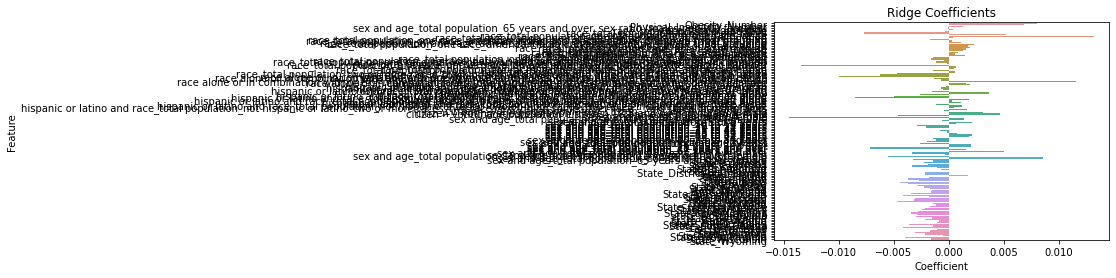

In [46]:
sns.barplot(x="Coefficient", y="Feature", data=ridge_reg_data).set_title("Ridge Coefficients")

In [47]:
print(mean_squared_error(y_train,ridge_reg.predict(X_train), squared=False))
print(r2_score(y_train,ridge_reg.predict(X_train)))

0.01895596448891738
0.5516335912218893


### Mingfeng: Technique 3 -- Lasso regression

Lasso regression is similar to Ridge regression except the L1 regularization used. It tends to push coefficients to zero and is often used in features selection. Likewise, it shares the same assumption as linear regression: linearity, constant variance, and independence. When the penalty term increases, parameters shrink and reduces the model complexity. Thus the bias increases and the variance decreases.

In [48]:

# lasso regression with all features
lasso_reg = Lasso(max_iter=10000)  

lasso_model = lasso_reg.fit(X_train, y_train)
lasso_reg_data = pd.DataFrame([lasso_model.coef_,
                              diabetes_clean.drop('Diabetes_Number',axis=1).columns[selector.get_support()]]).T
lasso_reg_data.columns = ['Coefficient', 'Feature']
lasso_reg_data['Coefficient'] = lasso_reg_data['Coefficient'].astype(float)

Text(0.5, 1.0, 'LASSO Coefficients')

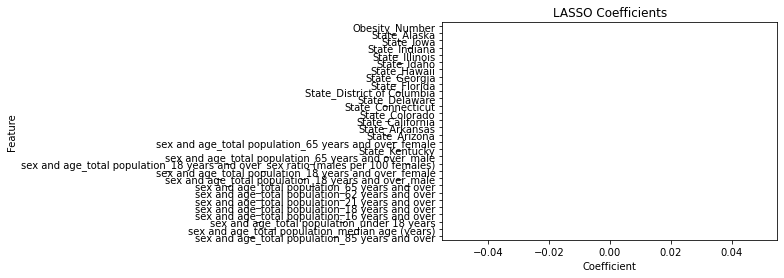

In [49]:
lasso_reg_data['abs_Coefficient']=lasso_reg_data.Coefficient.abs()
lasso_reg_data=lasso_reg_data.sort_values('abs_Coefficient',ascending=False)
sns.barplot(x="Coefficient", y="Feature", data=lasso_reg_data.iloc[0:30]).set_title("LASSO Coefficients")

In [50]:
print(mean_squared_error(y_train,lasso_reg.predict(X_train),  squared=False))
print(r2_score( y_train,lasso_reg.predict(X_train)))

0.028309314444614986
0.0


## 5. Validate and Refine Models

# 5.1 Predict on the Validation Set

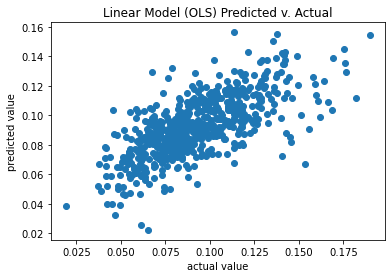

0.019528468128877065
0.483234591680225


In [51]:
# use X_validation and y_validation data sets to evaluate and refine your models

## Validation of the ordinary regression model
# predict the number of riders
lin_pred = lin_model.predict(X_validate)
# plot the residuals on a scatter plot
plt.scatter(y_validate, lin_pred)
plt.title('Linear Model (OLS) Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

print(mean_squared_error(y_validate,lin_pred,squared=False))
print(r2_score(y_validate,lin_pred))

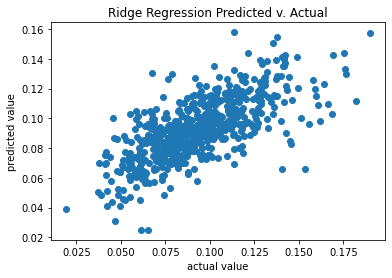

0.019426746409877432
0.48860412289556865


In [52]:
## Validation of the Ridge regression model
ridge_pred = ridge_reg.predict(X_validate)

plt.scatter(y_validate, ridge_pred)
plt.title('Ridge Regression Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

print(mean_squared_error(y_validate,ridge_pred, squared=False))
print(r2_score(y_validate,ridge_pred))

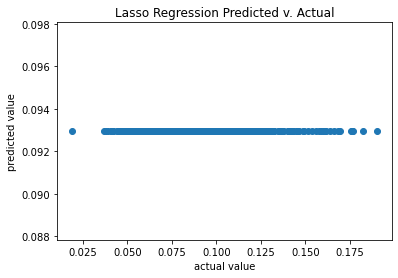

0.027174188588142145
-0.0006224681505604401


In [53]:
## Validation of the lasso regression model
lasso_pred = lasso_reg.predict(X_validate)
plt.scatter(y_validate, lasso_pred)
plt.title('Lasso Regression Predicted v. Actual')
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.show()

print(mean_squared_error(y_validate,lasso_pred, squared=False))
print(r2_score(y_validate,lasso_pred))

# 5.2 Feature Selection

In [54]:
# OLS feature selection
lin_reg_data = pd.DataFrame([lin_model.coef_,
                              diabetes_clean.drop('Diabetes_Number',axis=1).columns[selector.get_support()]]).T
lin_reg_data.columns = ['Coefficient', 'Feature']
lin_reg_data['abs_coef'] = lin_reg_data.Coefficient.abs()
lin_reg_data=lin_reg_data.sort_values('abs_coef',ascending=False)

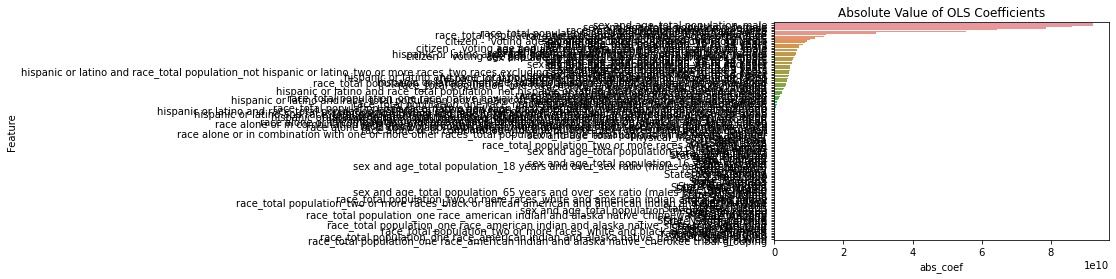

In [55]:
# Plot of Absolute Value of OLS Coefficients
ax = sns.barplot(x="abs_coef", y="Feature", data=lin_reg_data)
ax.set_title("Absolute Value of OLS Coefficients")
plt.show()

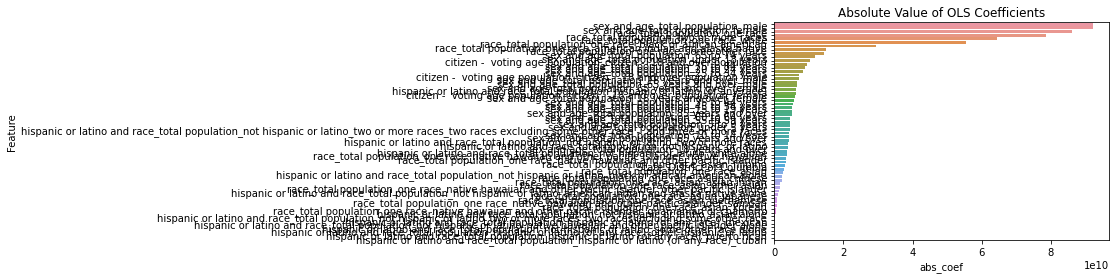

In [56]:
# Plot of Absolute Value of OLS Coefficients >1
ax = sns.barplot(x="abs_coef", y="Feature", data=lin_reg_data[lin_reg_data.abs_coef>1])
ax.set_title("Absolute Value of OLS Coefficients")
plt.show()

Answer: We use print out the coefficients data frame sorted according to abs_coef and found a cutoff point at 1 or more accurately at 0.114733, since there are no coefficients between 1 and 0.114733, we just use 1 for the sake of simplification.

In [57]:
lin_reg_data[lin_reg_data.abs_coef>1]

Coefficient                                            Feature  \
56  92176858327.526031                  sex and age_total population_male   
57  92176858327.514755                sex and age_total population_female   
4   86113073736.327606                     race_total population_one race   
5   78658316849.396149            race_total population_two or more races   
6  -64445901956.089775               race_total population_one race_white   
7  -55503447297.516922  race_total population_one race_black or africa...   
8  -29441155094.852032  race_total population_one race_american indian...   
26 -14975276223.855965     race_total population_one race_some other race   
69  14430625699.736347        sex and age_total population_65 to 74 years   
73 -11754341922.299955        sex and age_total population_under 18 years   
53  10378539950.001265  citizen -  voting age population_citizen -  18...   
70   9384374142.120991        sex and age_total population_75 to 84 years   
63   8847371854.635628        sex and age_total population_20 to 24 years   
64   8338090455.640988        sex and age_total population_25 to 34 years   
54  -7069206072.920313  citizen -  voting age population_citizen -  18...   
79  -7050834402.835218  sex and age_total population_18 years and over...   
82  -6599976279.727605  sex and age_total population_65 years and over...   
83  -6591970932.912111  sex and age_total population_65 years and over...   
37   6406850010.899395  hispanic or latino and race_total population_h...   
55  -6332389667.866293  citizen -  voting age population_citizen -  18...   
80  -5897332185.027716  sex and age_total population_18 years and over...   
65   5660159616.105957        sex and age_total population_35 to 44 years   
66    5511192465.46002        sex and age_total population_45 to 54 years   
62   5242202608.503662        sex and age_total population_15 to 19 years   
71    5132104661.04952     sex and age_total population_85 years and over   
68   5049349254.954876        sex and age_total population_60 to 64 years   
67   4473719281.625999        sex and age_total population_55 to 59 years   
60   4451485225.560295          sex and age_total population_5 to 9 years   
59   4449998118.681954         sex and age_total population_under 5 years   
51   4442734945.824329  hispanic or latino and race_total population_n...   
61   4365868785.187571        sex and age_total population_10 to 14 years   
78   4231933733.229345     sex and age_total population_65 years and over   
49  -4157942040.958315  hispanic or latino and race_total population_n...   
42   3967897273.284228  hispanic or latino and race_total population_n...   
75   -3916797273.63936     sex and age_total population_18 years and over   
43   3758988311.666687  hispanic or latino and race_total population_n...   
22  -3563701931.934269  race_total population_one race_native hawaiian...   
21   3516306210.486347  race_total population_one race_native hawaiian...   
16   -3350810618.96673      race_total population_one race_asian_filipino   
91  -3116157122.148326                         State_District of Columbia   
13  -2785707165.499498               race_total population_one race_asian   
44   2681818195.036066  hispanic or latino and race_total population_n...   
15  -2162532167.969913       race_total population_one race_asian_chinese   
14  -2119594295.122292  race_total population_one race_asian_asian indian   
20  -1710889281.927216   race_total population_one race_asian_other asian   
25  -1646970552.415905  race_total population_one race_native hawaiian...   
45    1399115897.87085  hispanic or latino and race_total population_n...   
17  -1063277100.976871      race_total population_one race_asian_japanese   
19   -905884380.904359    race_total population_one race_asian_vietnamese   
24   -905464363.087635  race_total population_one race_native hawaiian...   
18   -769587242.871067        race_total population_one race_asian_korean   
23   -6

In [58]:
# Ridge regression feature selection
ridge_reg_data = pd.DataFrame([ridge_model.coef_, diabetes_clean.drop('Diabetes_Number',axis=1).columns[selector.get_support()]]).T
ridge_reg_data.columns = ['Coefficient', 'Feature']
ridge_reg_data['Coefficient'] = ridge_reg_data['Coefficient']
ridge_reg_data['abs_coef'] = ridge_reg_data.Coefficient.abs()
ridge_reg_data=ridge_reg_data.sort_values('abs_coef',ascending=False)

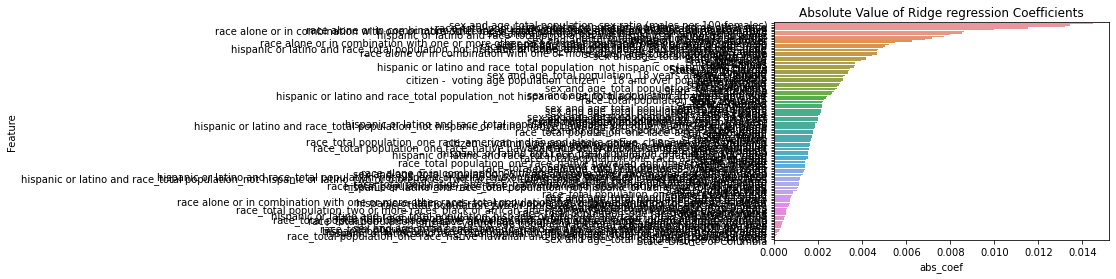

In [59]:
# Plot of Absolute Value of OLS Coefficients
ax = sns.barplot(x="abs_coef", y="Feature", data=ridge_reg_data)
ax.set_title("Absolute Value of Ridge regression Coefficients")
plt.show()

(array([14., 16., 19., 23., 16.,  7.,  9.,  6.,  3.,  5.,  3.,  1.,  0.,
         1.,  2.,  1.,  1.,  2.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  2.,  0.,  1.]),
 array([3.1312178855427785e-30, 0.0004828354286113333,
        0.0009656708572226666, 0.001448506285834, 0.0019313417144453332,
        0.0024141771430566663, 0.002897012571668, 0.0033798480002793334,
        0.0038626834288906665, 0.0043455188575019996, 0.004828354286113333,
        0.005311189714724667, 0.005794025143336, 0.006276860571947333,
        0.006759696000558667, 0.00724253142917, 0.007725366857781333,
        0.008208202286392666, 0.008691037715003999, 0.009173873143615332,
        0.009656708572226665, 0.010139544000838, 0.010622379429449333,
        0.011105214858060666, 0.011588050286672, 0.012070885715283333,
        0.012553721143894666, 0.013036556572505999, 0.013519392001117334,
        0.014002227429728667, 0.01448506285834], dtype=object),
 <BarContainer object of 30 artists>)

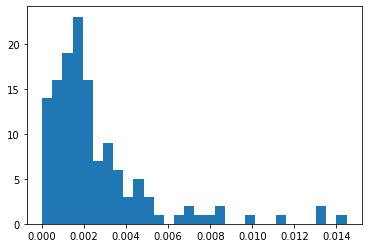

In [60]:
plt.hist(ridge_reg_data.abs_coef,bins=30)

Answer: We take the absolute value of 0.002 as the cutoff, which can select out many unimportant features.

In [61]:
ridge_reg_data[ridge_reg_data.abs_coef>0.002]

Coefficient                                            Feature  abs_coef
58    -0.014485  sex and age_total population_sex ratio (males ...  0.014485
26    -0.013427     race_total population_one race_some other race  0.013427
8      0.013194  race_total population_one race_american indian...  0.013194
36     0.011547  race alone or in combination with one or more ...  0.011547
33     -0.00997  race alone or in combination with one or more ...   0.00997
83     0.008615  sex and age_total population_65 years and over...  0.008615
46    -0.008509  hispanic or latino and race_total population_n...  0.008509
0      0.007997                                     Obesity_Number  0.007997
6     -0.007694               race_total population_one race_white  0.007694
77    -0.007185     sex and age_total population_62 years and over  0.007185
1      0.006828                         Physical_Inactivity_Number  0.006828
32    -0.006278  race alone or in combination with one or more ...  0.006278
82    -0.005478  sex and age_total population_65 years and over...  0.005478
7      0.005195  race_total population_one race_black or africa...  0.005195
79     0.005018  sex and age_total population_18 years and over...  0.005018
45    -0.004962  hispanic or latino and race_total population_n...  0.004962
110   -0.004714                                     State_Nebraska  0.004714
31     -0.00466  race alone or in combination with one or more ...   0.00466
57    -0.004652                sex and age_total population_female  0.004652
56     0.004652                  sex and age_total population_male  0.004652
98    -0.004437                                         State_Iowa  0.004437
106   -0.004155                                    State_Minnesota  0.004155
126   -0.004148                                        State_Texas  0.004148
132   -0.003951                                    State_Wisconsin  0.003951
99    -0.003669                                       State_Kansas  0.003669
96    -0.003658                                     State_Illinois  0.003658
43      0.00365  hispanic or latino and race_total population_n...   0.00365
124   -0.003605                                 State_South Dakota  0.003605
117   -0.003447                                 State_North Dakota  0.003447
105    -0.00339                                     State_Michigan   0.00339
88    -0.003371                                     State_Colorado  0.003371
80     -0.00335  sex and age_total population_18 years and over...   0.00335
84    -0.003205                                       State_Alaska  0.003205
109   -0.003148                                      State_Montana  0.003148
55     0.003128  citizen -  voting age population_citizen -  18...  0.003128
129   -0.003109                                     State_Virginia  0.003109
108    -0.00303                                     State_Missouri   0.00303
119   -0.002981                                     State_Oklahoma  0.002981
100   -0.002922                                     State_Kentucky  0.002922
63    -0.002869        sex and age_total population_20 to 24 years  0.002869
118   -0.002868                                         State_Ohio  0.002868
116    -0.00277                               State_North Carolina   0.00277
97    -0.002695                                      State_Indiana  0.002695
74    -0.002621     sex and age_total population_16 years and over  0.002621
44    -0.002574  hispanic or latino and race_total population_n...  0.002574
115    -0.00242                                     State_New York   0.00242
13     0.002343               race_total population_one race_asian  0.002343
101   -0.002251                                    State_Louisiana  0.002251
86     -0.00221                                     State_Arkansas   0.00221
93    -0.002181                                      State_Georgia  0.002181
114    -0.00218                                   State_New Mexico   0.00218


In [62]:
# Lasso regression feature selection

lasso_reg_data = pd.DataFrame([lasso_model.coef_,
                              diabetes_clean.drop('Diabetes_Number',axis=1).columns[selector.get_support()]]).T
lasso_reg_data.columns = ['Coefficient', 'Feature']
lasso_reg_data['abs_coef'] = lasso_reg_data.Coefficient.abs()
lasso_reg_data.sort_values('abs_coef',ascending=False)[0:30]

Coefficient                                            Feature abs_coef
0           0.0                                     Obesity_Number      0.0
84         -0.0                                       State_Alaska      0.0
98         -0.0                                         State_Iowa      0.0
97          0.0                                      State_Indiana      0.0
96         -0.0                                     State_Illinois      0.0
95         -0.0                                        State_Idaho      0.0
94         -0.0                                       State_Hawaii      0.0
93          0.0                                      State_Georgia      0.0
92          0.0                                      State_Florida      0.0
91          0.0                         State_District of Columbia      0.0
90          0.0                                     State_Delaware      0.0
89         -0.0                                  State_Connecticut      0.0
88         -0.0                                     State_Colorado      0.0
87         -0.0                                   State_California      0.0
86          0.0                                     State_Arkansas      0.0
85         -0.0                                      State_Arizona      0.0
83          0.0  sex and age_total population_65 years and over...      0.0
100         0.0                                     State_Kentucky      0.0
82          0.0  sex and age_total population_65 years and over...      0.0
81         -0.0  sex and age_total population_18 years and over...      0.0
80          0.0  sex and age_total population_18 years and over...      0.0
79          0.0  sex and age_total population_18 years and over...      0.0
78          0.0     sex and age_total population_65 years and over      0.0
77          0.0     sex and age_total population_62 years and over      0.0
76          0.0     sex and age_total population_21 years and over      0.0
75          0.0     sex and age_total population_18 years and over      0.0
74          0.0     sex and age_total population_16 years and over      0.0
73         -0.0        sex and age_total population_under 18 years      0.0
72         -0.0    sex and age_total population_median age (years)      0.0
71         -0.0     sex and age_total population_85 years and over      0.0

Answer: LASSO tend to push coefficients to zero so feature selection can be done. We chose the top 30 features according to the absolute values of their coefficients

# 5.3 Test Set

Based on R squared and RMSE on validation set, our best model is Ridge regression. Then we use 0.002 as the coefficient cutoff to select out unimportant features. Then we retrain the model and try on test data.

In [63]:
feature_index=ridge_reg_data.loc[ridge_reg_data.abs_coef>0.002,'Feature']

feature_index=diabetes_clean.drop('Diabetes_Number',axis=1).columns[selector.get_support()].isin(feature_index)

re_ridge_reg = Ridge()
# fit the model
re_ridge_model = ridge_reg.fit(X_train[:,feature_index], y_train)

y_test_predict=re_ridge_model.predict(X_test[:,feature_index])
print(mean_squared_error(y_test,y_test_predict, squared=False))
print(r2_score(y_test,y_test_predict))

0.021401286693833736
0.4299099626272719


In [64]:
pred_county=pd.DataFrame({'county':diabetes.County,
                         'predicted_ratio':re_ridge_model.predict(X[:,feature_index])})
pred_county=pred_county.sort_values('predicted_ratio',ascending=False)

In [65]:
pred_county.head()

county  predicted_ratio
416       Clay County         0.163381
5      Bullock County         0.162900
1935  Hertford County         0.161549
2184  Okfuskee County         0.159904
43       Macon County         0.155560

# 5.4 Implement a Cross-Validation Approach

In [66]:
from sklearn.model_selection import cross_val_score

cv_ridge_predict = cross_val_score(re_ridge_model, X, y,scoring='neg_mean_squared_error', cv = 10)
print(cv_ridge_predict)
abs(cv_ridge_predict.mean())
#Absolute value to get rid of negative sign that is defaulted in sklearn

[-0.0005446  -0.00071071 -0.00063297 -0.00054618 -0.00055498 -0.00059029
 -0.00065336 -0.00057196 -0.00094023 -0.00052436]


0.0006269647580916242

K represents the number of "folds" we're splitting our data into during the cross-validation. Therefore, a lower K means that
our folds are bigger and more similar to the original data. As a result, we run a higher risk of "overfitting" (variance). Too high a K can be computationally intensive, and given that we have smaller folds, introduce more bias in our estimation.
Our k-folds cross-validated RMSE was much lower (i.e., less error) than in our test/validation/test split. Here, our RMSE was 0.0006 and with our test/validation/test split it was 0.02140.

## 6. Discussion Questions

# 6.1 What is bias-variance tradeoff ? Why is it relevant to machine learning problems like this one?

In machine learning bias refers to the error introduced by using an oversimplified model to estimate your target function, or underfitting the model to your training data so that not enough is learned from the training data. Variance refers to the error introduced by overfitting your model to your training data, in other words, learning too much from the intricacies that may be unique to your training data and can lead to big changes in the estimate of your target function based on the training set you use. The bias-variance tradeoff is the tension between overfitting and underfitting your model to your training data. This tension is at the heart of machine learning problems because to develop a model with a high level of prediction accuracy you must balance errors introduced by over or under fitting your data.

# 6.2 Define overfitting, and why it matters for machine learning. How can we address it?

Overfitting can occur with more flexible/complex models that estimate a large number of parameters (James, Witten, Hastie, & Tibshirani, 2013). The model might follow the errors or noise in a dataset too closely; in this case, we might expect to see a small training mean squared error (MSE) but a much larger test MSE because patterns identified in the training data are absent in the test data. For machine learning, overfitting is undesirable because the model fit will not yield accurate estimates of the response on any new observations that were not included in the original training data.
In cases of overfitting, we might look to a less complex model which would yield a smaller test MSE. We might consider constraining the number of estimated coefficients, thereby reducing the variance at the cost of a negligible increase in bias; feature selection (removing extraneous variables from the model) might lead to more interpretable results. Increasing the size of our training data might also help mitigate the problem of overfitting.

# 6.3 Discuss your Analysis in 2-3 Paragraphs

## Summary of our approach to model selection

As an initial step, we explored the data descriptively using a series of data visualizations 
(Section 2). To prepare our data for the model training process, we partitioned it into 
training (60%), validation (20%), and test (20%) sets (Section 3). We first trained Linear 
Regression, Ridge Regression, and LASSO Regression models on the training data set; the 
OLS regression model appeared to have the lowest root mean squared error (RMSE) (Section
4). As a next step, we used the validation data set to evaluate and further refine the models 
(Section 5). As expected, the RMSE for the validation data set were larger than for the 
training data set because the models were fit to the training data. We found that the Ridge 
Regression model produced least error in estimation and was therefore the best performing 
model for predicting diabetes rates in U.S. counties. Once we excluded unimportant features
from the model (using 0.002 as the coefficient cutoff), we retrained the Ridge Regression 
model and predicted outcome rates on the test data set. As a final step, we used a k-fold 
cross-validation approach to refit our Ridge Regression model; the cross-validated RMSE was
lower than that of the test/validation/test split. 

## Findings and recommendations
Based on predictions from the Ridge Regression model, we recommend prioritizing the 
following counties: Clay County, Bullock County, Hertford County, Okfuskee County, Macon 
County. Our findings suggest that the racial, gender, and age composition of counties are 
important features for policymakers to take into account. More specifically, it appears that 
counties with certain racial composition (i.e., more American Indians and fewer Hispanics), 
more women than men, and more older people (greater proportion of the population older 
than 65 years old) were likely to have higher rates of diabetes. In thinking through solutions it is important to reflect on the social conditions that underlie the relationship between race // ethnicity and diabetes rate.

## Limitations
Despite our careful approach to this analysis, there are a number of other factors that 
should be considered before deploying this type of model in a real-world program 
application aimed at diabetes prevention. First, for an intervention aimed at preventing 
diabetes, it would be useful to have more detailed data on diabetes by stage and by type. 
Second, since our predictions are based on county-level information from the U.S. census, 
data on health and behavioral outcomes as well as sociodemographic factors reflect the 
situation of each county in year 2020.  Thus, county-level estimates might fluctuate based 
on acute shocks (i.e., the Covid-19 pandemic or natural disasters) or potential inter and 
intra-state migration, thereby changing our list of five priority counties. Third, it could be 
useful to include other relevant predictors in the model that might indicate county 
vulnerability to diabetes (i.e., measures of household income, current healthcare 
access/uptake within each county, etc.). This is important because our training data are 
based only on diagnosed cases of diabetes and do not include undiagnosed cases, which 
might be common in areas where healthcare access/uptake are low or among populations 
that are not well-captured by the census (i.e., people who are unhoused).


Source:
James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning with Applications in R. New York: Springer Texts in Statistics. doi:10.1007/978-1-4614-7138-7